Regularization adds a penalty on the different parameters of the model to reduce the freedom of the model. Hence, the model will be less likely to fit the noise of the training data and will improve the generalization abilities of the model.
<br>The L1 regularization (also called Lasso)
<br>The L2 regularization (also called Ridge)
<br>The L1/L2 regularization (also called Elastic net)

<b>L1 Regularization (Lasso penalisation)</b>
<br>The L1 regularization adds a penalty equal to the sum of the absolute value of the coefficients. 
<br><b>L2 Regularization (Ridge penalisation)</b>
<br>The L2 regularization adds a penalty equal to the sum of the squared value of the coefficients.
<br><b>Elastic-net</b>
<br>Elastic-net is a mix of both L1 and L2 regularizations. A penalty is applied to the sum of the absolute values and to the sum of the squared values:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
from scipy.optimize import minimize

In [5]:
#getting the data
data=loadmat('Data/LinearReg2.mat')
#gets loaded in form of a dictionary
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [6]:
#getting the training set
X_train=np.array(data['X'])
y_train=np.array(data['y'])
#adding the bias term in the front
X_train  = np.hstack((np.ones_like(y_train), X_train))
#getting the cross validation set
y_val = data['yval']
#adding the bias term in the front
X_val = np.c_[np.ones_like(data['Xval']), data['Xval']]
#the dimensions of the sets
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(12, 2)
(12, 1)
(21, 2)
(21, 1)


Text(0,0.5,'water flowing out of the dam')

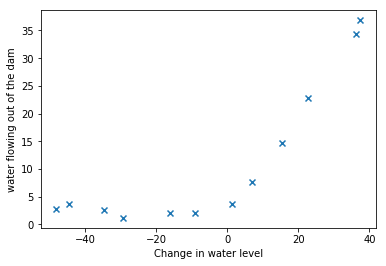

In [7]:
#lets plot our data
plt.scatter(X_train[:,1],y_train,marker='x')
plt.xlabel('Change in water level')
plt.ylabel('water flowing out of the dam')

In [8]:
#regularized cost function
def cost(theta,X,y,reg):
    m=len(y)
    theta = theta[:,None]
    #calculating cost
    J=((np.sum((np.dot(X,theta) - y)**2))/(2*m) + (reg/(2*m))*np.sum(theta**2))
    #calculating gradient
    gradients = ((np.sum((np.dot(X,theta)-y)*X,axis=0)/m)+(reg/m)*theta.T)
    # Replace gradient for theta_0 with non-regularized
    gradients[0] = gradients[0] - (reg/m)*theta.T
    gradients = gradients.flatten()
    return (J,gradients)

In [9]:
# #this uses vectorization with l2 norm regression to find directly the min theta value
# def gradient(,theta,X,y,Lambda):
#     # X transpose
#     Xtranspose = np.matrix.transpose(X) 
#     # Identity matrix (number of parameters is the dimension)
#     Identity = np.identity(len(X[1,:])) 
#     # We don't add penalty to intercept
#     Identity[0,0] = 0
#     # Closed form solution is BetaHat = inv(X'X + Lambda*I)*X'y
#     # Estimate model parameters (if Lambda = 0, we get standard square loss function result)
#     BetaHat = np.dot(np.linalg.inv(np.add(np.dot(Xtranspose,X),Lambda*Identity)),np.dot(Xtranspose,y))
#     return BetaHat

In [10]:
theta = np.ones(np.size(X_train,1))
cost1,grad = cost(theta,X_train, y_train, 0)
#grad = gradient(theta,X_train, y_train, 0)
print("Initial Cost:",cost1)
print("Gradients:",grad)


Initial Cost: 303.9515255535976
Gradients: [-15.30301567 598.16741084]


In [11]:
#when Unvectorized gradient descent is used
def trainLinearReg(X, y,reg):
    initial_theta = np.zeros(np.size(X,1))      
    res = minimize(cost,initial_theta,args=(X,y,reg),jac=True,options={'maxiter':1000,'disp':True})
    return(res)

In [12]:
#fitting the parameters when unvectorized gradient descent is used
fit = trainLinearReg(X_train, y_train, 0)
fit

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


      fun: 22.373906495108915
 hess_inv: array([[1.03142187, 0.00617881],
       [0.00617881, 0.001215  ]])
      jac: array([4.44089210e-16, 4.14483263e-15])
  message: 'Optimization terminated successfully.'
     nfev: 5
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([13.08790351,  0.36777923])

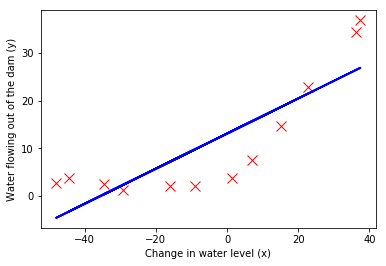

In [13]:
# Plot linear fit 
plt.plot(X_train[:,[1]], y_train, 'rx', markersize=10, linewidth=1.5)
plt.plot(X_train[:,[1]],np.dot(X_train,fit.x),'b-',linewidth=2)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

In [14]:
#learning Curve
def learningCurve(X, y, Xval, yval, reg):
    m_train = len(X)
    m_val = len(X)
    error_train = np.zeros(m_train)
    error_val = np.zeros(m_val)
    for i in range(1,m_train+1):
        res =trainLinearReg(X[:i],y[:i], reg)
        error_train[i-1] = (np.sum((np.dot(X[:i],res.x)-y[:i])**2))/(2.0*i)
        error_val[i-1] =(np.sum((np.dot(Xval,res.x)-yval)**2))/(2.0*m_val)
        print(i,"\t",error_train[i-1],"\t",error_val[i-1])
    
    return(error_train, error_val)

In [15]:
error_train, error_val=  learningCurve(X_train, y_train, X_val, y_val, 0.0)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
1 	 3.944304526105059e-31 	 6052.8331016572565
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 6
         Gradient evaluations: 6
2 	 0.46181223013098305 	 4863.236727935532
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
3 	 703.6942416294514 	 7657.154128741825
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
4 	 1144.4093817510047 	 8011.4615031287785
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 3
         Function evaluations: 5
         G

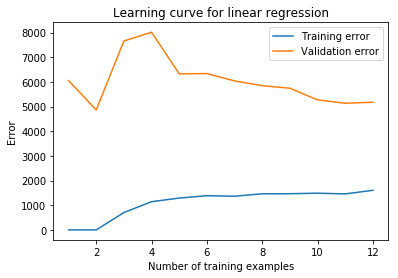

In [16]:
plt.plot(np.arange(1,13),error_train, label='Training error')
plt.plot(np.arange(1,13), error_val, label='Validation error')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();

In [17]:
#validation curve
def validationCurve(X, y, Xval, yval):
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]).reshape((-1,1))
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))

    for i in range(len(lambda_vec)):
        m_train = len(X)
        m_val = len(Xval)
        reg_param = lambda_vec[i]
        est_theta = trainLinearReg(X,y,reg_param)
        error_train[i] = (np.sum((np.dot(X,est_theta.x)-y)**2))/(2.0*m_train)
        error_val[i] = (np.sum((np.dot(Xval,est_theta.x)-yval)**2))/(2.0*m_val)

    return (lambda_vec, error_train, error_val)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.381049
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.395335
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.445335
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.588192
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.088192
         Iterations: 3
         Function evaluations: 5
         Grad

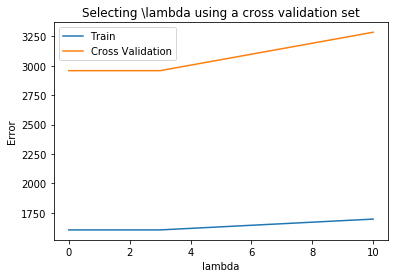

In [18]:
# Validation for selecting lambda
lambda_vec, error_train, error_val = validationCurve(X_train,y_train,X_val,y_val)
plt.plot(lambda_vec, error_train, lambda_vec, error_val);
plt.title('Selecting \lambda using a cross validation set')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()

In [8]:
# Regularized regression in scikit-learn
# Predict the violent crime rate for a community given socioeconomic and law enforcement data
import pandas as pd
url='http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
crime = pd.read_csv(url, header=None, na_values=['?'])
print(crime.head())
crime.info()

   0     1        2                    3    4     5     6     7     8     9    \
0    8   NaN      NaN         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
1   53   NaN      NaN          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
2   24   NaN      NaN         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
3   34   5.0  81440.0  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
4   42  95.0   6096.0    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   

   ...    118   119   120   121   122  123  124   125   126   127  
0  ...   0.12  0.26  0.20  0.06  0.04  0.9  0.5  0.32  0.14  0.20  
1  ...   0.02  0.12  0.45   NaN   NaN  NaN  NaN  0.00   NaN  0.67  
2  ...   0.01  0.21  0.02   NaN   NaN  NaN  NaN  0.00   NaN  0.43  
3  ...   0.02  0.39  0.28   NaN   NaN  NaN  NaN  0.00   NaN  0.12  
4  ...   0.04  0.09  0.02   NaN   NaN  NaN  NaN  0.00   NaN  0.03  

[5 rows x 128 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns

In [9]:
# examine the response variable
crime[127].describe()
# remove categorical features
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)
# remove rows with any missing values
crime.dropna(inplace=True)
crime.head()

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21,0.69
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63


In [14]:
#split into training and testing sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(crime, test_size=0.2)


In [27]:
# define X and y
X_train=train.drop(127, axis=1)
y_train = train[127].values.reshape(len(train[127]),1)
X_test=test.drop(127, axis=1)
y_test = test[127].values.reshape(len(test[127]),1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(255, 122)
(255, 1)
(64, 122)
(64, 1)


Text(0,0.5,'per capita violent crimes ')

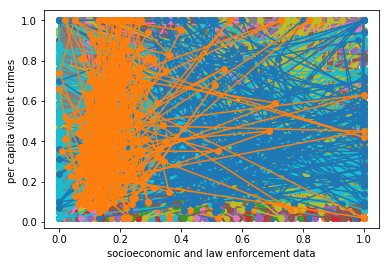

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train,y_train,marker='o')
plt.xlabel('socioeconomic and law enforcement data')
plt.ylabel('per capita violent crimes ')

In [54]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
# make predictions
y_pred =reg.predict(X_test)

In [55]:
#calculate RMSE
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.24531326196205036


In [56]:
#lasso Regression
from sklearn.linear_model import Lasso
lassoreg=Lasso(alpha=0.01,normalize=True)
lassoreg.fit(X_train,y_train)
y_pred=lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.23713301231899783


In [58]:
# **n_alphas:** number of alpha values (automatically chosen) 
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
# predict method uses the best alpha value
print(lassoregcv.alpha_)
y_pred = lassoregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0016252491870525237
0.16735891613698994


In [59]:
# Ridge regression
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=0.1,normalize=True)
ridgereg.fit(X_train,y_train)
y_pred=ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.1932680129061479


In [60]:
# select the best alpha with RidgeCV
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='mean_squared_error')
ridgeregcv.fit(X_train, y_train)
print(ridgeregcv.alpha_)
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.0
0.17761483601547207


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight